## Visualisation Presentation
For this presentation I will be using a kaggle datset (https://www.kaggle.com/code/fulviocapra/sc2-iem-katowice-data-analytics/notebook)

This is analylitical data about Sc2 pro games during the Intel Extreme Master (IEM) esports tournament held in Katowice, Poland.
I will clean, display and draw insights from the data using the python packages show below.

In [53]:
# Importing the packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Now i will import the csv dataset from locally
iem = pd.read_csv("IEM_games.csv")
iem.head()

,Unnamed: 0,Year,Date,Time,Player1,Player2,MapName,Length,Race1,Race2,...,APM2,AvgSPM,SPM1,SPM2,AvgSQ,SQ1,SQ2,AvgPSC,PSC1,PSC2
0,1,2016,03-05,17:17:08,Polt,Snute,RuinsOfSeras,23:26,T,Z,...,248,17.163381,14.196245,20.137111,77,69,86,3.337298,5.128205,1.546392
1,2,2016,03-05,16:52:16,Polt,Snute,Ulrena,12:23,T,Z,...,263,18.672701,14.107624,23.208086,87,86,87,8.285741,6.862745,9.708738
2,3,2016,03-05,16:32:38,Polt,Snute,CentralProtocol,13:07,T,Z,...,308,14.074966,13.373235,14.778725,92,91,93,11.009174,7.339450,14.678899
3,4,2016,03-05,16:12:22,Polt,Snute,PrionTerraces,07:19,T,Z,...,240,19.217802,14.791656,23.669906,103,110,96,9.016393,8.196721,9.836066
4,5,2016,03-05,16:02:56,Polt,Snute,OrbitalShipyard,17:03,T,Z,...,268,18.318570,16.786930,19.855524,96,99,92,7.783938,4.929577,10.638298


## Understanding the Data
Though most of the columns are have obvious meaning, Their are some player statistics that will need to be explained to those unfamilar is RTS terminology.

- **APM** - actions per minute - This refers to the amount of keyboard and mouse clicks that occur within a minute. This is used as a way of measuring a players speed and therefore skill. Not always accurate as alot of spamming* occurs.


- **SPM** - screens per minute - Refers to how many screens are processed a minute. Similar to apm it is a measure of speed and is not always 
accurate due to spamming*


- **SQ** - spending quotient - $ \text{SQ} = 35 \cdot \log(\sqrt{\text{Income} \cdot \text{Spending Rate}}) - 0.00137 \cdot (\text{Unspent}) + 240 $ This is a Star Craft specific statistic and measures how well you are macroing*. The higher the number, the better the player is doing. 

- **PSC** - percentage supply capped - Shows the time the player was supply capped* during the game as a percentage of total game length. The lower the number the better but is not always accuracte for longer games where players are at max supply

## Cleaning the data

In [55]:
# The data itself is already in good shape, index column can be removed
iem.drop(columns = "Unnamed: 0", inplace = True)
iem.head()

,Year,Date,Time,Player1,Player2,MapName,Length,Race1,Race2,Matchup,...,APM2,AvgSPM,SPM1,SPM2,AvgSQ,SQ1,SQ2,AvgPSC,PSC1,PSC2
0,2016,03-05,17:17:08,Polt,Snute,RuinsOfSeras,23:26,T,Z,TvZ,...,248,17.163381,14.196245,20.137111,77,69,86,3.337298,5.128205,1.546392
1,2016,03-05,16:52:16,Polt,Snute,Ulrena,12:23,T,Z,TvZ,...,263,18.672701,14.107624,23.208086,87,86,87,8.285741,6.862745,9.708738
2,2016,03-05,16:32:38,Polt,Snute,CentralProtocol,13:07,T,Z,TvZ,...,308,14.074966,13.373235,14.778725,92,91,93,11.009174,7.339450,14.678899
3,2016,03-05,16:12:22,Polt,Snute,PrionTerraces,07:19,T,Z,TvZ,...,240,19.217802,14.791656,23.669906,103,110,96,9.016393,8.196721,9.836066
4,2016,03-05,16:02:56,Polt,Snute,OrbitalShipyard,17:03,T,Z,TvZ,...,268,18.318570,16.786930,19.855524,96,99,92,7.783938,4.929577,10.638298


In [56]:
# I can also optionally split data into years to make certain process easier.
iemyear = {year: group for year, group in iem.groupby("Year")}
iemyear[2019].head()

,Year,Date,Time,Player1,Player2,MapName,Length,Race1,Race2,Matchup,...,APM2,AvgSPM,SPM1,SPM2,AvgSQ,SQ1,SQ2,AvgPSC,PSC1,PSC2
918,2019,03-03,14:54:00,soO,Stats,YearZeroLE,07:45,Z,P,ZvP,...,226,35.228658,38.371884,32.045011,117,127,107,8.533654,7.692308,9.375000
919,2019,03-03,14:44:57,soO,Stats,PortAleksanderLE,12:15,Z,P,ZvP,...,209,40.730579,45.778627,35.671710,125,127,122,12.745098,13.725490,11.764706
920,2019,03-03,14:31:42,soO,Stats,King'sCoveLE,09:41,Z,P,ZvP,...,203,47.161839,52.263138,42.049113,129,141,117,9.876543,8.641975,11.111111
921,2019,03-03,14:16:30,soO,Stats,KairosJunctionLE,09:50,Z,P,ZvP,...,202,37.057723,38.584905,35.525171,130,138,121,5.487805,3.658537,7.317073
922,2019,03-03,14:05:40,soO,Stats,CyberForestLE,09:57,Z,P,ZvP,...,207,37.717354,43.617584,31.825371,133,143,124,6.626506,3.614458,9.638554


The result columns could be combined into one column but that would make indivual player stats harder to find so i will leave it.

## Analysis 

To start I will be analysing the apm statistic. It is a staple measure of skill in the rts genre of games and will be a good starting point.

Text(0.5, 1.0, 'Average APM over Time')

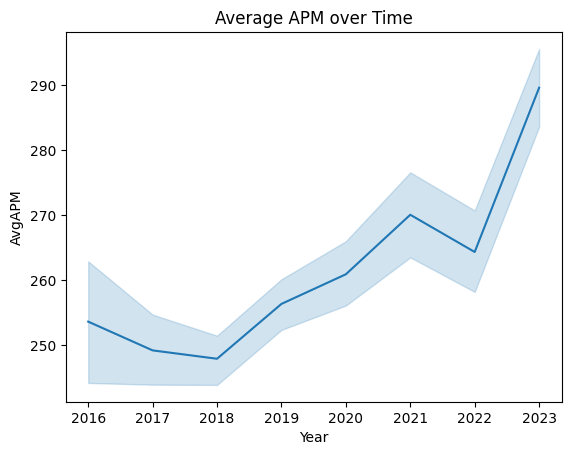

In [58]:
# Lets first look at overall apm across the entrie 7 years of IEM
sns.lineplot(x = "Year", y = "AvgAPM", data=iem )

plt.title("Average APM over Time")

As you can see their has been a very steady increase in APM over the first 6 years with a huge jump in 2022 - 2023.

<Axes: xlabel='Year', ylabel='AvgSPM'>

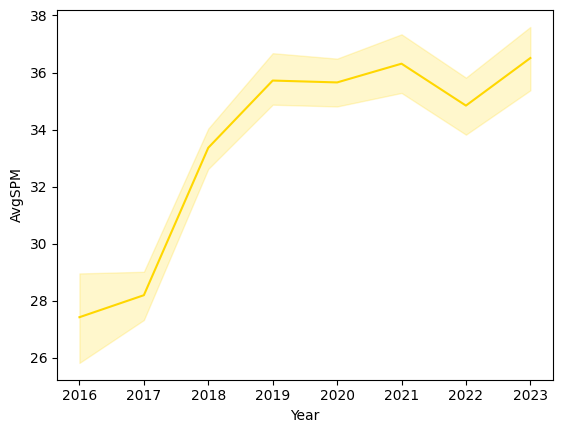

In [87]:
# Lets compare this to SPM.
sns.lineplot(x="Year" , y = "AvgSPM", color = "gold", data=iem)

This again shows a huge increase that plateaus at around 36 spm. This dramatic increase in 2017 - 2018 coinsides with the increase of apm, safely impling that the skill of players has increased over time.

### Race split

The 3 races in the game (Zerg, Terran and Protoss) all have different basic mechanics to each other. For example, The playstyle promotes lots of cheap, weaker unit that overwhelm the enemy compared to the Protoss' few , expensive heavy-hitting units.


This should i want to see how this is represented through APM.

In [80]:
# Lets split the data into the 3 different races.
# This will be more difficult than expected as both player 1 and 2 can be either race.
# I think the best way to do this will be using the race column and a 'or' statment

zergmatches = iem[(iem["Race1"] == "Z") | (iem["Race2"] == "Z")]

# Now I want to get the apm of the zerg player in the match.

zerg1 = zergmatches.loc[zergmatches["Race1"] == "Z", ["Year" ,"APM1"]].rename(columns = {"APM1":"APM"})
zerg2 = zergmatches.loc[zergmatches["Race2"] == "Z", ["Year" ,"APM2"]].rename(columns = {"APM2":"APM"})

# Now i will combine the 2 datframes to get a complete list.

zerg_apm_year = pd.concat([zerg1, zerg2], ignore_index=True)
zerg_apm_year

,Year,APM
0,2016,361
1,2016,371
2,2016,321
3,2016,255
4,2016,245
...,...,...
1780,2023,331
1781,2023,243
1782,2023,257
1783,2023,338


In [91]:
# Repeat this with all the other races
#Protoss
tossmatches = iem[(iem["Race1"] == "P") | (iem["Race2"] == "P")]

toss1 = tossmatches.loc[tossmatches["Race1"] == "P", ["Year" ,"APM1"]].rename(columns = {"APM1":"APM"})
toss2 = tossmatches.loc[tossmatches["Race2"] == "P", ["Year" ,"APM2"]].rename(columns = {"APM2":"APM"})

toss_apm_year = pd.concat([toss1, toss2], ignore_index=True)
toss_apm_year

,Year,APM
0,2016,190
1,2016,176
2,2016,183
3,2016,186
4,2016,197
...,...,...
1808,2023,208
1809,2023,240
1810,2023,221
1811,2023,223


In [92]:
#Terran
terrmatches = iem[(iem["Race1"] == "T") | (iem["Race2"] == "T")]

terr1 = terrmatches.loc[terrmatches["Race1"] == "T", ["Year" ,"APM1"]].rename(columns = {"APM1":"APM"})
terr2 = terrmatches.loc[terrmatches["Race2"] == "T", ["Year" ,"APM2"]].rename(columns = {"APM2":"APM"})

terr_apm_year = pd.concat([terr1, terr2], ignore_index=True)
terr_apm_year

,Year,APM
0,2016,216
1,2016,242
2,2016,209
3,2016,251
4,2016,211
...,...,...
1557,2023,239
1558,2023,279
1559,2023,286
1560,2023,256


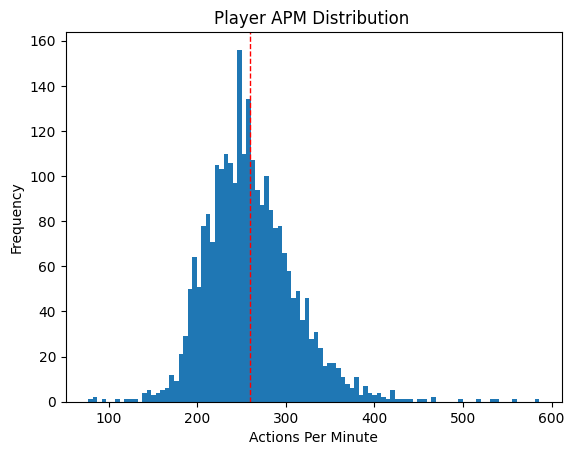

In [123]:
# Before we do the multi line plot, Lets compare overall apm distribution.
# Over all APM

plt.hist(iem["AvgAPM"], bins = 100)
plt.xlabel("Actions Per Minute")
plt.ylabel("Frequency")
plt.title("Player APM Distribution ")
# Lets also plot the mean on it so its easier to infer the distribution
apm_mean = np.mean(iem["AvgAPM"])
plt.axvline(apm_mean, color='red', linestyle='dashed', linewidth=1)

plt.show()

This shows a normal distribution with a mean of around 260 apm.

Text(0.5, 1.0, 'Player APM Distribution by Race')

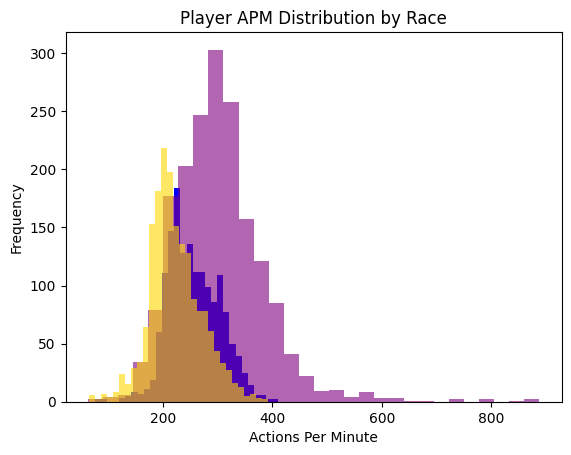

In [136]:
# Lets do a hist but seperate into races

plt.hist(terr_apm_year["APM"], bins=30, alpha=1, color='blue', label='Terran')
plt.hist(zerg_apm_year["APM"], bins=30, alpha=0.6, color='purple', label='Zerg')
plt.hist(toss_apm_year["APM"], bins=30, alpha=0.6, color='gold', label='Protoss')

plt.xlabel("Actions Per Minute")
plt.ylabel("Frequency")
plt.title("Player APM Distribution by Race")

<Axes: xlabel='Year', ylabel='APM'>

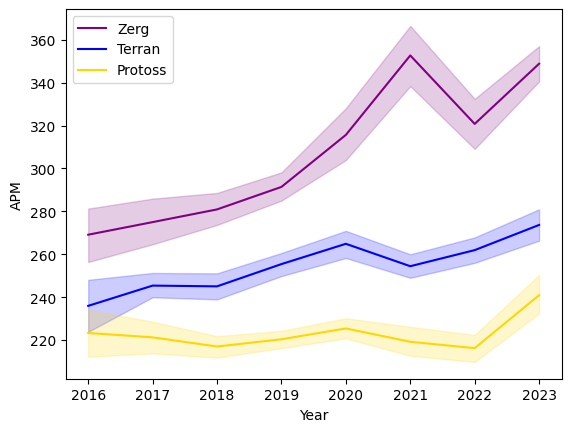

In [130]:
# Now let make multi-line plot
sns.lineplot(x = "Year", y = "APM", color = "purple", label ="Zerg", data = zerg_apm_year) 
sns.lineplot(x = "Year", y = "APM", color = "blue" , label ="Terran", data = terr_apm_year)
sns.lineplot(x = "Year", y = "APM", color = "gold" , label ="Protoss", data = toss_apm_year)



- This graph really higlights how zergs have become significantly faster over the 7 years. This is due to the nature of zerg mechanics and how they promote hit and run tactics which generally require higher apm.
- Terran has seen a increase, but a slight one.
- Protoss has remained relativly constant.

If we take APM as a flat measure of skill, This graph suggests that Zergs are leaps and bounds better than the other two races. This is most certainly not the case.


### Match Result Data
